### *EDA Section*

### *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as mtick

Set style for plots

In [2]:
sns.set(style="whitegrid")
plt.style.use('ggplot')

### Import data

In [3]:
df = pd.read_csv('apple_financial_merged_revised.csv')

Start from 1994

In [4]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Filter data to include only from 1994 onwards
df = df[df['date'].dt.year >= 1994]

# Set date as index for time series analysis
df.set_index('date', inplace=True)

1. Data Overview

In [5]:
print("Data Head:\n", df.head())
print("\nData Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Data Head:
            currency_symbol  totalCashFromOperatingActivities  \
date                                                           
1994-09-30             USD                       736995000.0   
1995-09-30             USD                      -240000000.0   
1996-09-30             USD                       519000000.0   
1997-09-30             USD                       188000000.0   
1998-09-30             USD                       775000000.0   

            totalCashflowsFromInvestingActivities  \
date                                                
1994-09-30                             -1802000.0   
1995-09-30                           -402000000.0   
1996-09-30                           -119000000.0   
1997-09-30                           -499000000.0   
1998-09-30                           -543000000.0   

            totalCashFromFinancingActivities  freeCashFlow   netIncome  \
date                                                                     
1994-09-30         

2. Descriptive Statistics

In [6]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       totalCashFromOperatingActivities  \
count                      3.100000e+01   
mean                       3.705200e+10   
std                        4.191971e+10   
min                       -2.400000e+08   
25%                        7.865000e+08   
50%                        1.015900e+10   
75%                        6.760750e+10   
max                        1.221510e+11   

       totalCashflowsFromInvestingActivities  \
count                           3.100000e+01   
mean                           -1.015115e+10   
std                             2.125752e+10   
min                            -5.627400e+10   
25%                            -1.989400e+10   
50%                            -1.488000e+09   
75%                            -6.040100e+07   
max                             4.589600e+10   

       totalCashFromFinancingActivities  freeCashFlow     netIncome  \
count                      3.100000e+01  3.100000e+01  3.100000e+01   
mean        

Convert descriptive stats to billions for readability

In [7]:
desc_billions = df.describe().copy()
for col in desc_billions.columns:
    if pd.api.types.is_numeric_dtype(desc_billions[col]):
        desc_billions[col] = desc_billions[col] / 1e9
print("\nDescriptive Statistics (in billions):")
print(desc_billions)


Descriptive Statistics (in billions):
       totalCashFromOperatingActivities  \
count                      3.100000e-08   
mean                       3.705200e+01   
std                        4.191971e+01   
min                       -2.400000e-01   
25%                        7.865000e-01   
50%                        1.015900e+01   
75%                        6.760750e+01   
max                        1.221510e+02   

       totalCashflowsFromInvestingActivities  \
count                           3.100000e-08   
mean                           -1.015115e+01   
std                             2.125752e+01   
min                            -5.627400e+01   
25%                            -1.989400e+01   
50%                            -1.488000e+00   
75%                            -6.040100e-02   
max                             4.589600e+01   

       totalCashFromFinancingActivities  freeCashFlow     netIncome  \
count                      3.100000e-08  3.100000e-08  3.100000e-08  

3. Plot time series for key financial metrics with formatted y-axis

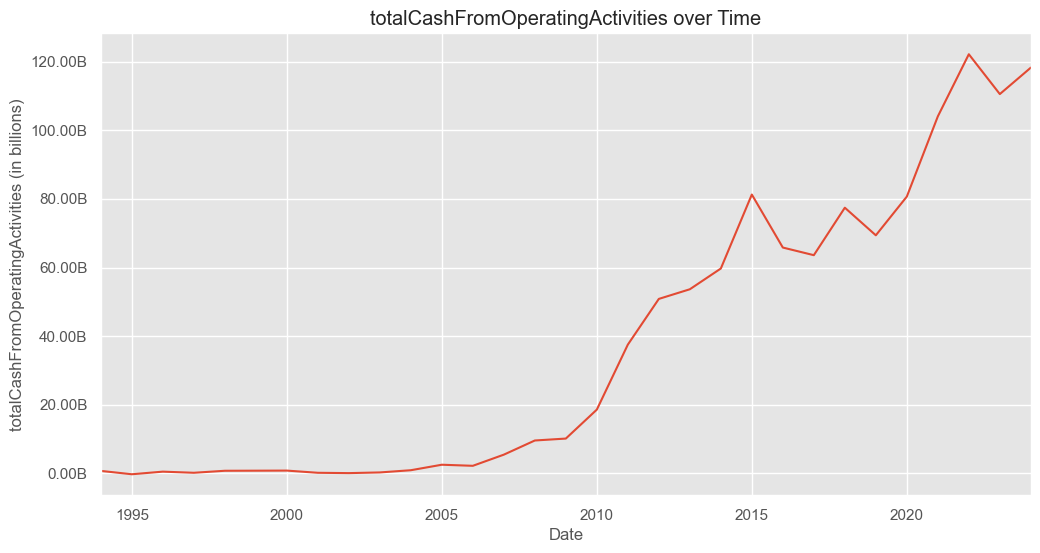

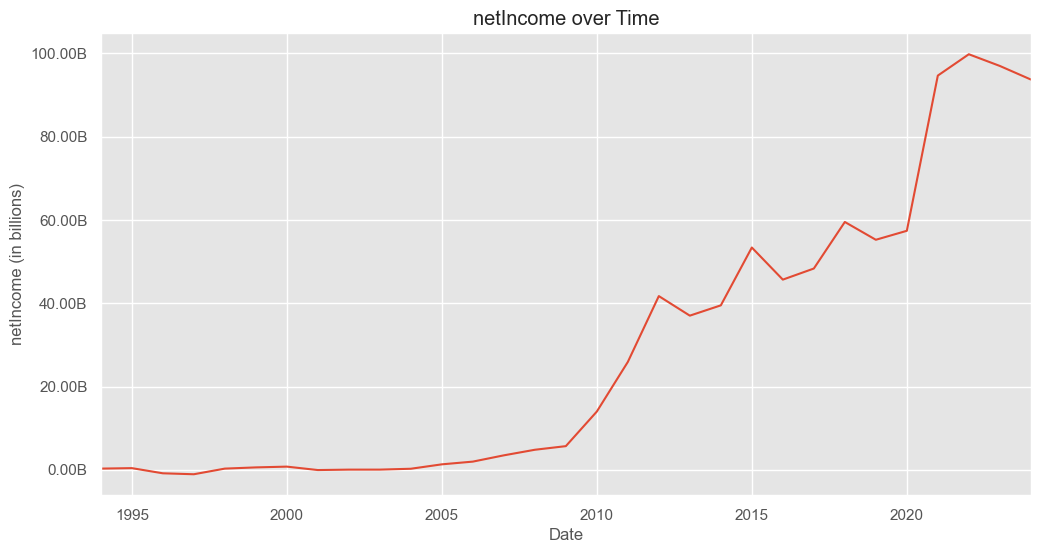

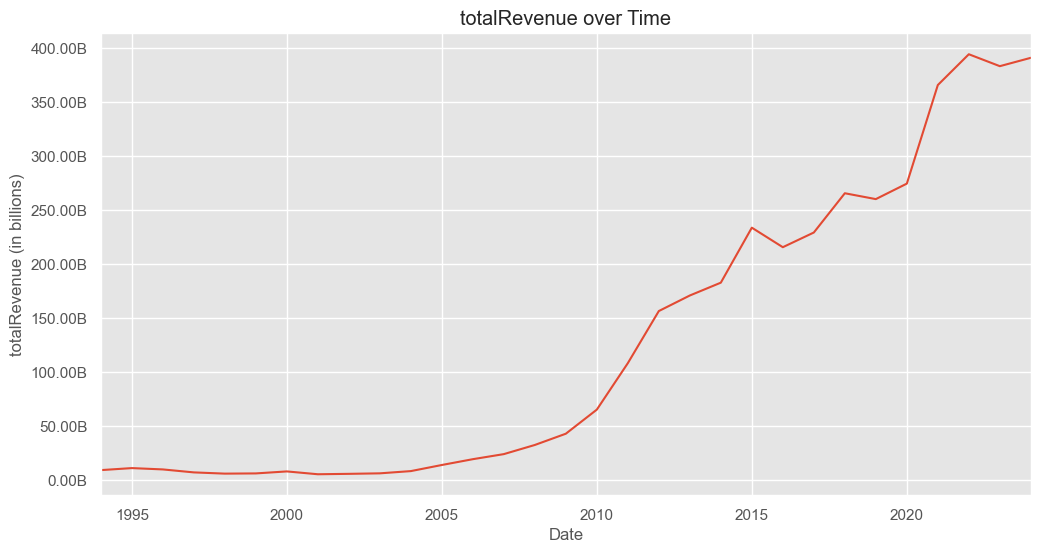

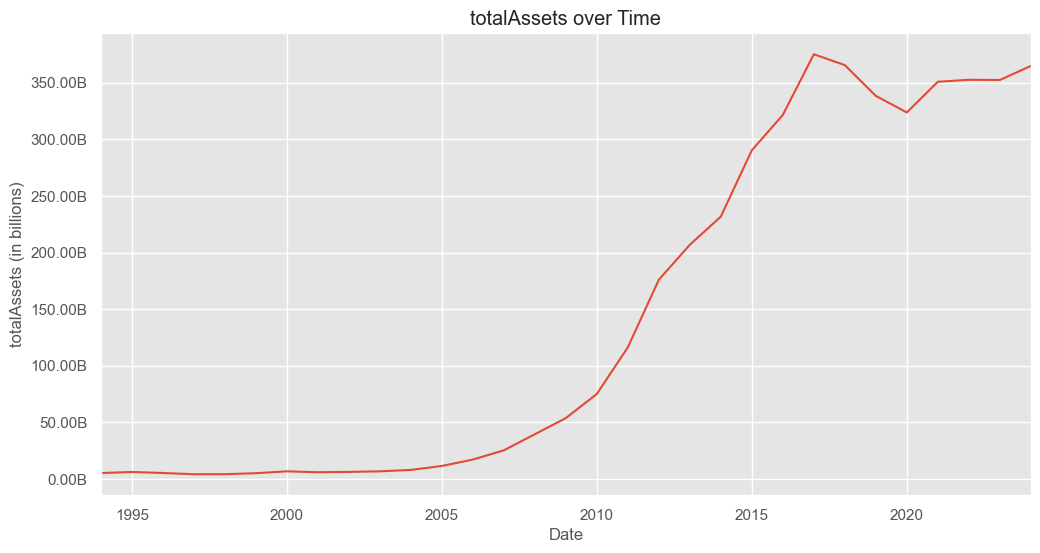

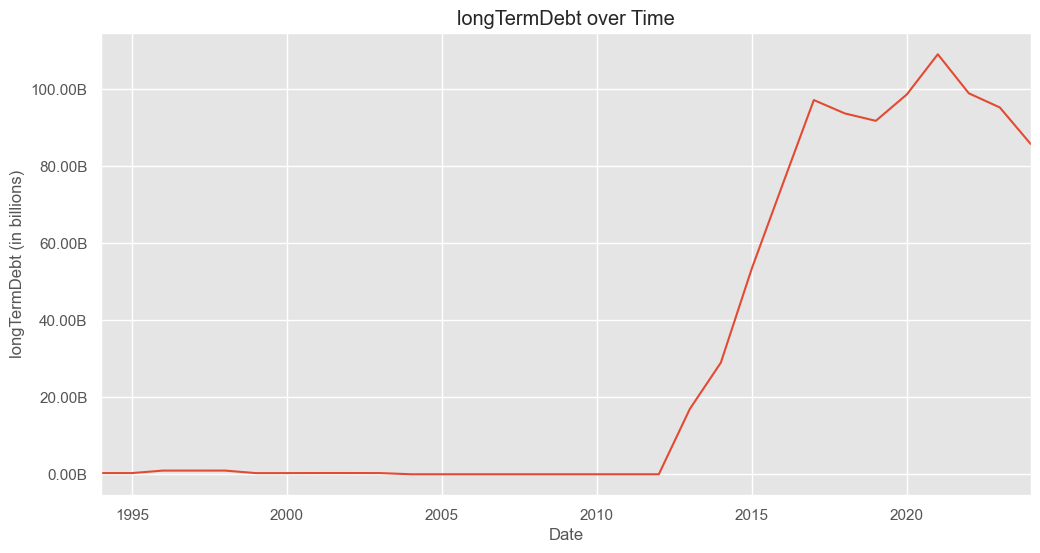

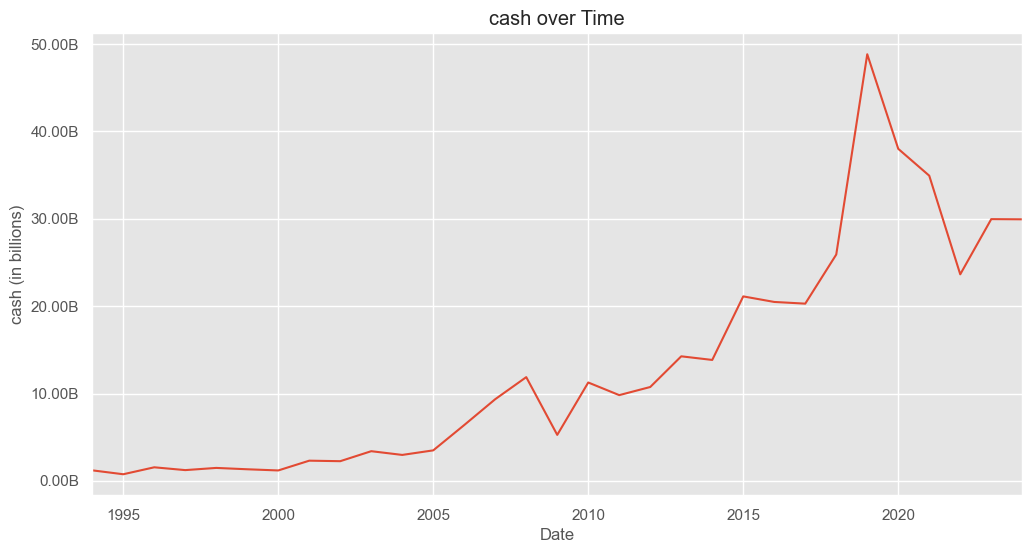

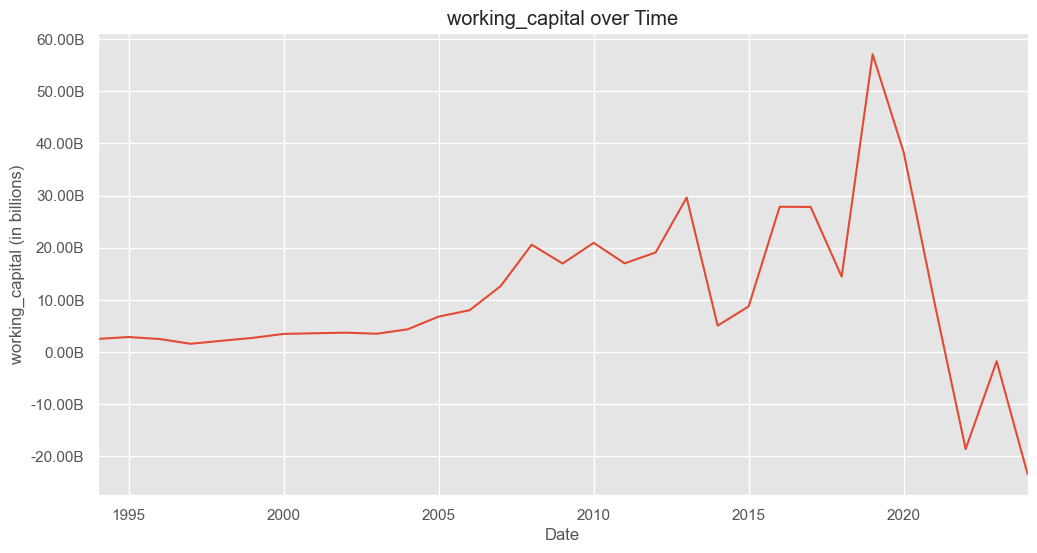

In [8]:
metrics = ['totalCashFromOperatingActivities', 'netIncome', 'totalRevenue', 'totalAssets', 'longTermDebt', 'cash', 'working_capital']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    df[metric].plot(title=f"{metric} over Time")
    plt.xlabel('Date')
    plt.ylabel(f'{metric} (in billions)')
    plt.gca().yaxis.set_major_formatter(
        mtick.FuncFormatter(lambda x, pos: '{:.2f}B'.format(x/1e9))
    )
    plt.show()

4. Distribution analysis

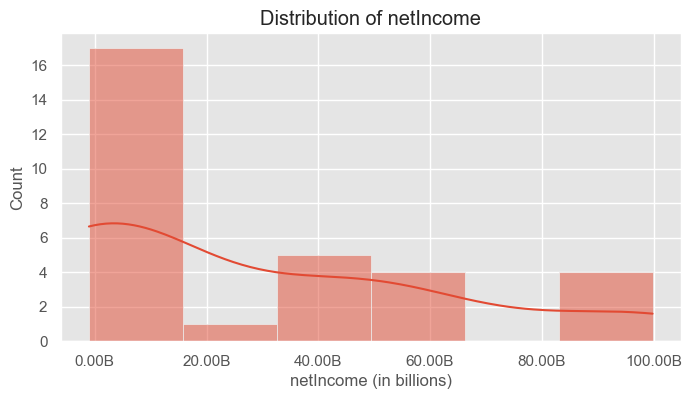

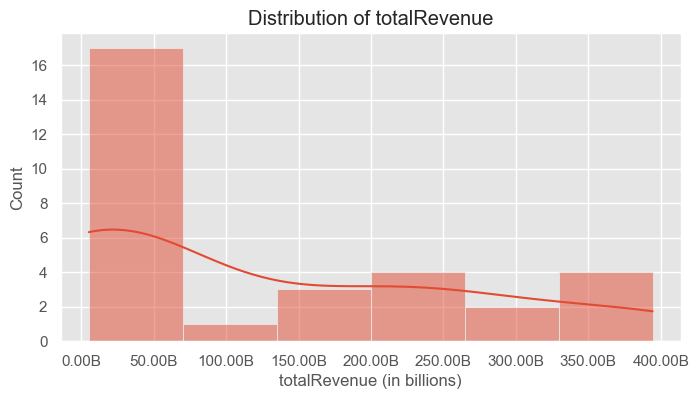

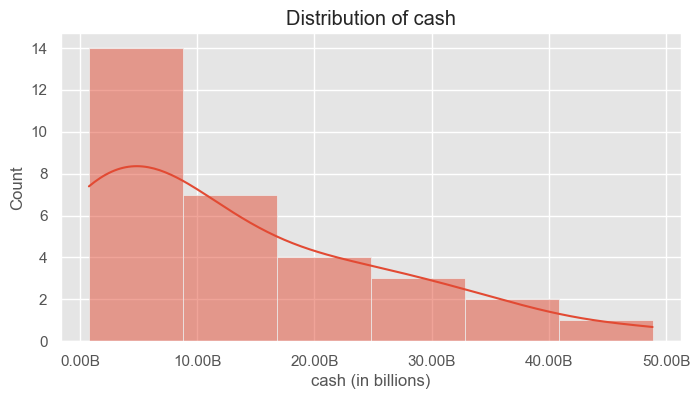

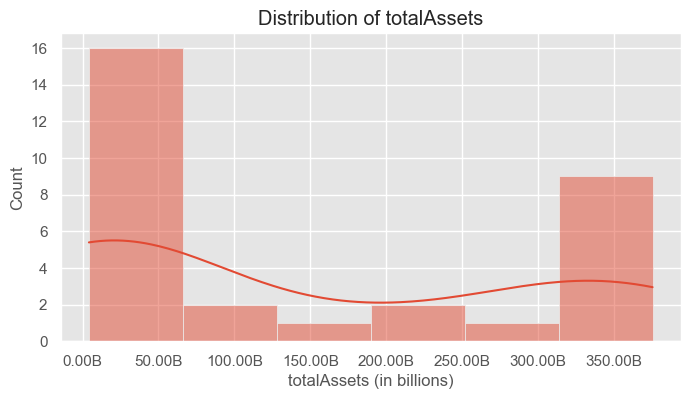

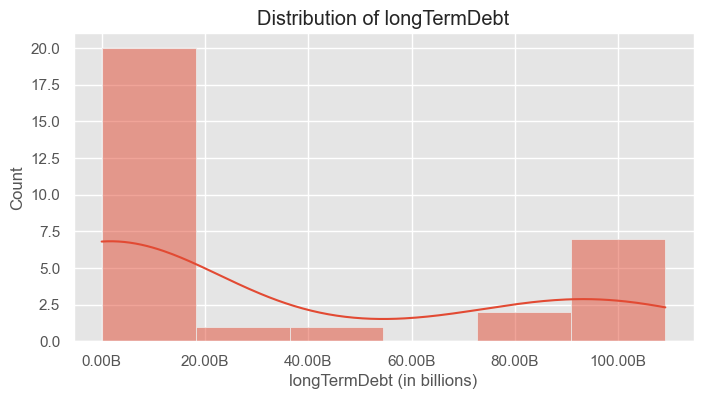

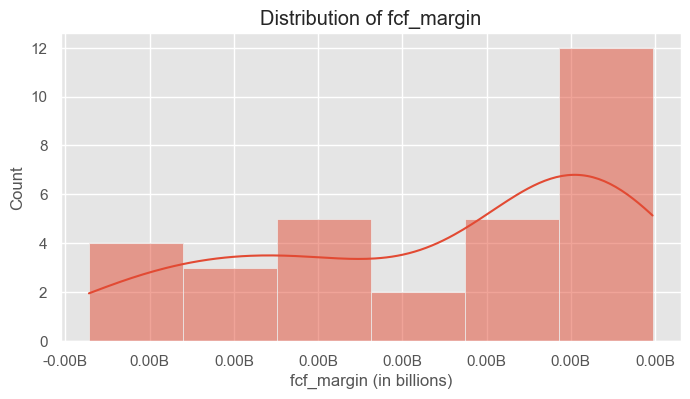

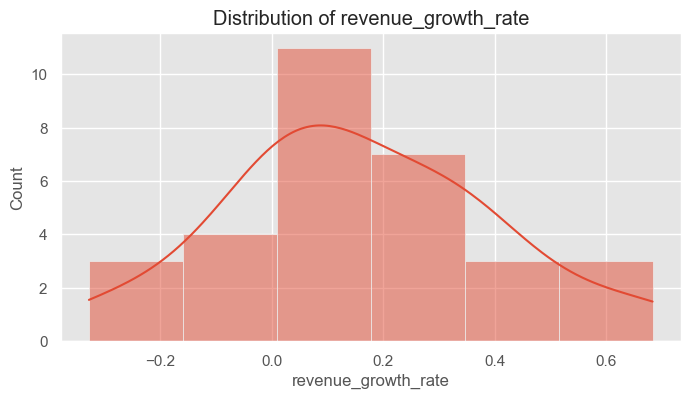

In [9]:
for col in ['netIncome', 'totalRevenue', 'cash', 'totalAssets', 'longTermDebt', 'fcf_margin', 'revenue_growth_rate']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} (in billions)' if col != 'revenue_growth_rate' else col)
    if col != 'revenue_growth_rate':
        plt.gca().xaxis.set_major_formatter(
            mtick.FuncFormatter(lambda x, pos: '{:.2f}B'.format(x/1e9))
        )
    plt.show()

5.Boxplots for outlier detection

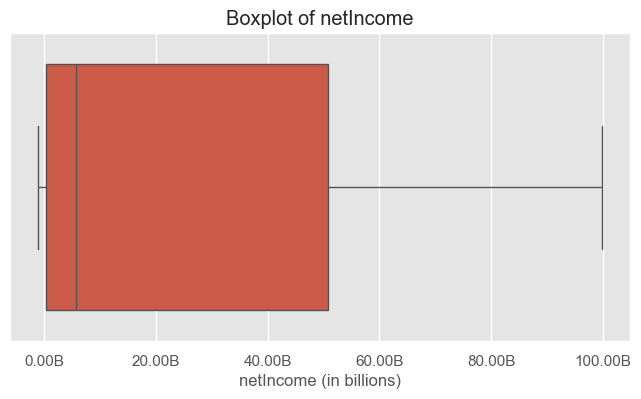

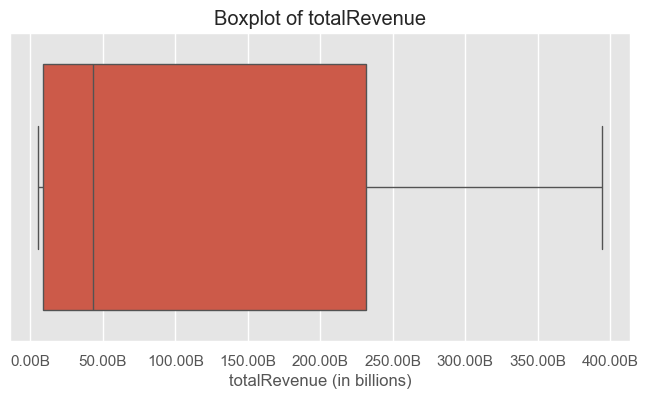

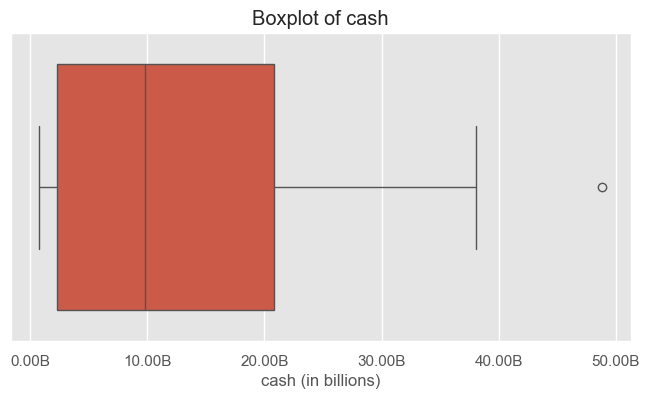

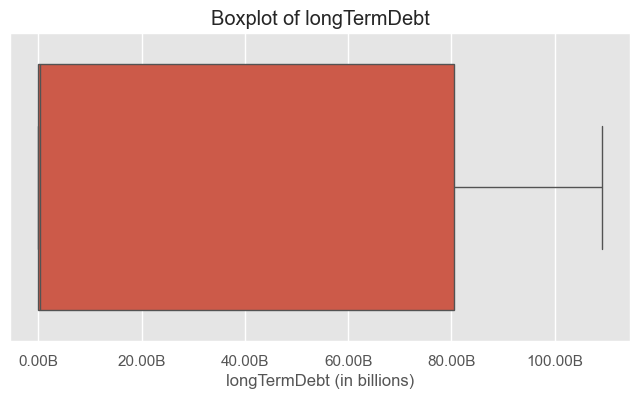

In [10]:
for col in ['netIncome', 'totalRevenue', 'cash', 'longTermDebt']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col} (in billions)')
    plt.gca().xaxis.set_major_formatter(
        mtick.FuncFormatter(lambda x, pos: '{:.2f}B'.format(x/1e9))
    )
    plt.show()

6. Correlation matrix heatmap

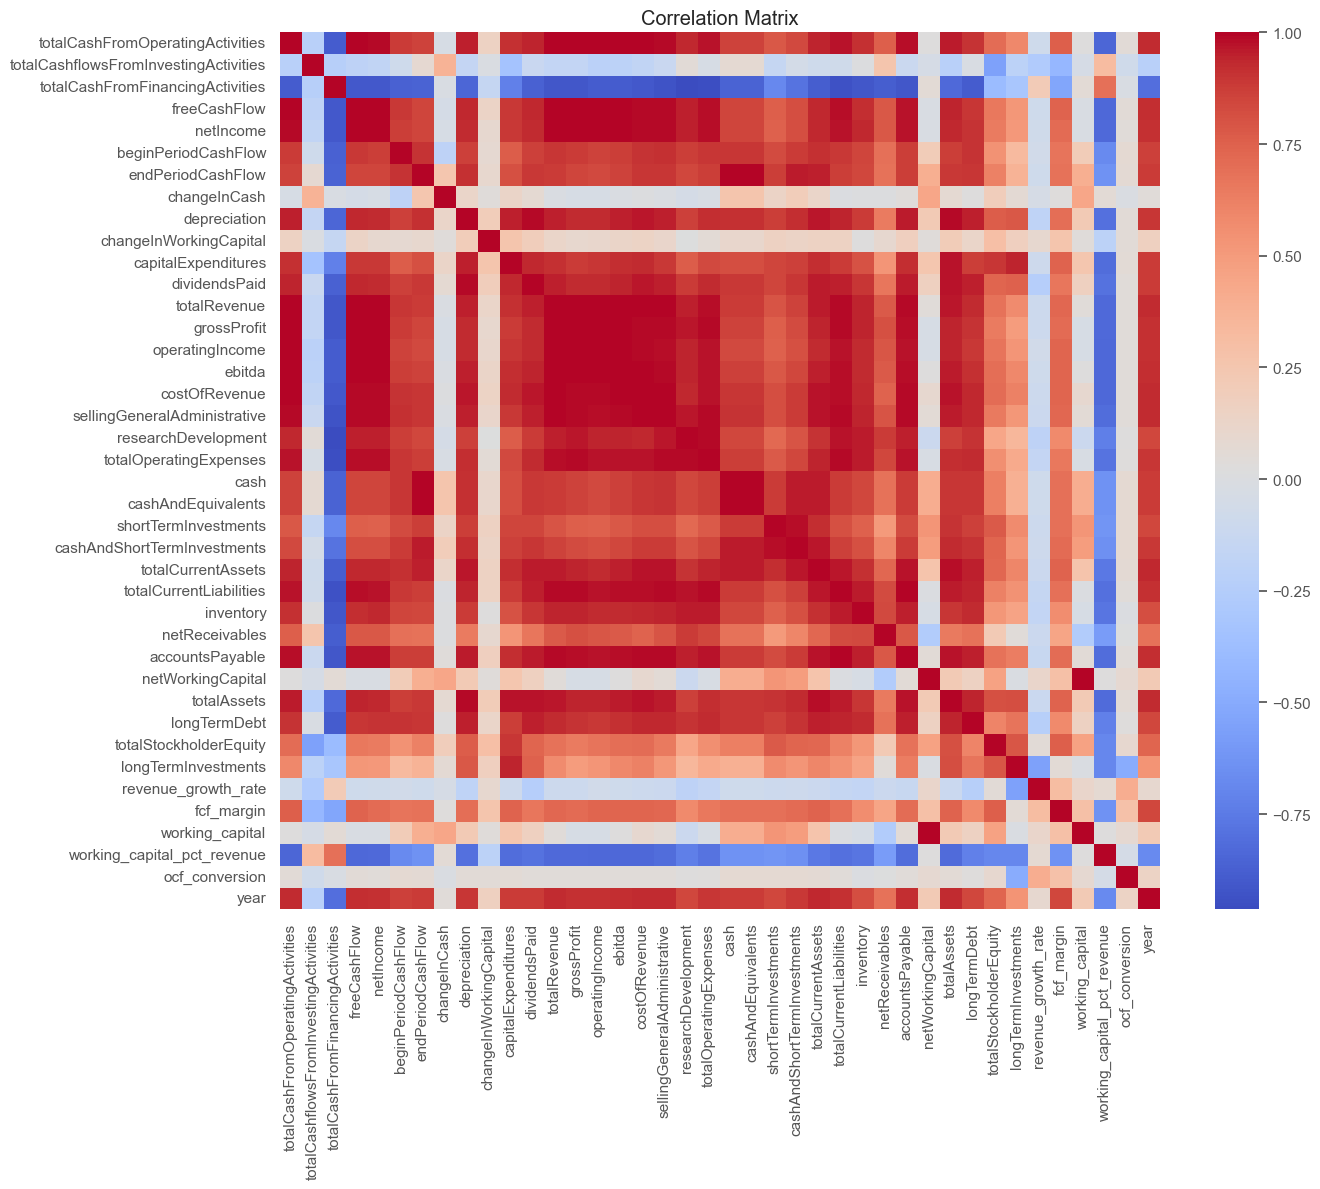

In [11]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

7. Scatter plots for selected relationships

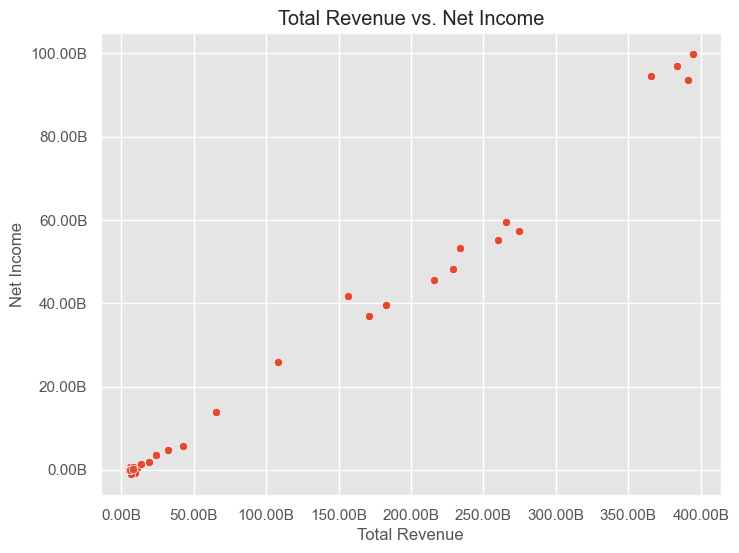

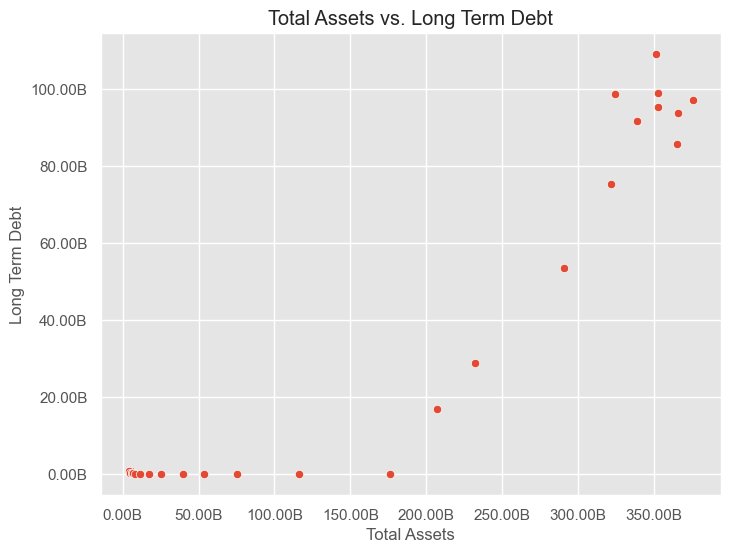

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='totalRevenue', y='netIncome', data=df)
plt.title('Total Revenue vs. Net Income')
plt.xlabel('Total Revenue')
plt.ylabel('Net Income')
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: '{:.2f}B'.format(x/1e9))
)
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda y, pos: '{:.2f}B'.format(y/1e9))
)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='totalAssets', y='longTermDebt', data=df)
plt.title('Total Assets vs. Long Term Debt')
plt.xlabel('Total Assets')
plt.ylabel('Long Term Debt')
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: '{:.2f}B'.format(x/1e9))
)
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda y, pos: '{:.2f}B'.format(y/1e9))
)
plt.show()

8. Explore ratios over time

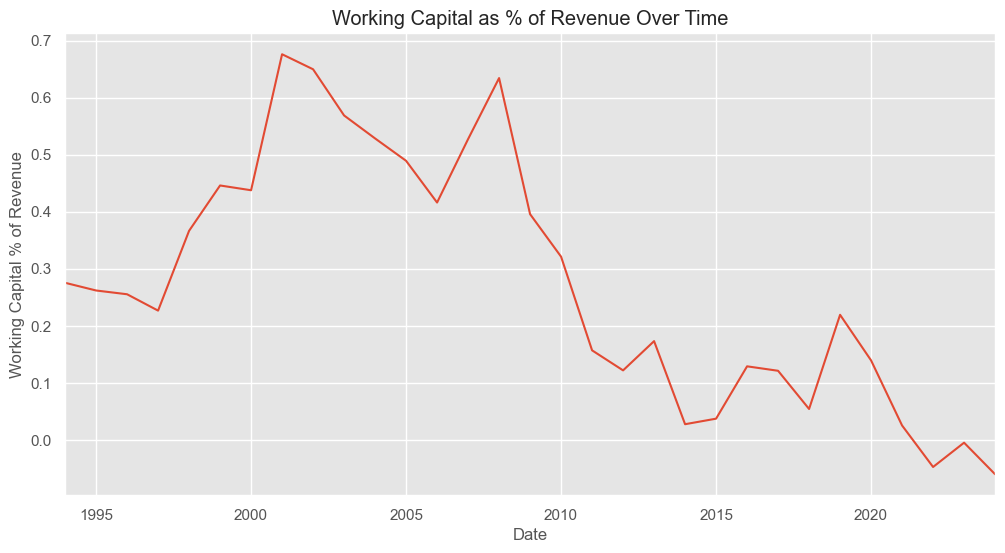

In [13]:
if 'working_capital' in df.columns and 'totalRevenue' in df.columns:
    df['working_capital_pct_revenue'] = df['working_capital'] / df['totalRevenue']
    plt.figure(figsize=(12,6))
    df['working_capital_pct_revenue'].plot(title='Working Capital as % of Revenue Over Time')
    plt.xlabel('Date')
    plt.ylabel('Working Capital % of Revenue')
    plt.show()

In [15]:
# Create lagged features for time series modeling
df['lag1_revenue'] = df['totalRevenue'].shift(1)
df['lag1_expenses'] = df['totalOperatingExpenses'].shift(1)
df['lag2_revenue'] = df['totalRevenue'].shift(2)
df['lag2_expenses'] = df['totalOperatingExpenses'].shift(2)

In [17]:
# Drop rows with NaN values due to lagging
df = df.dropna()

In [18]:
# Define features and target variables
features = ['year', 'lag1_revenue', 'lag1_expenses', 'lag2_revenue', 'lag2_expenses', 'working_capital_pct_revenue']
X = df[features]
y_revenue = df['totalRevenue']
y_expenses = df['totalOperatingExpenses']

In [19]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# 4. Build Regression Models
# Revenue model
revenue_model = LinearRegression()
revenue_model.fit(X_scaled, y_revenue)
revenue_pred = revenue_model.predict(X_scaled)
revenue_mse = mean_squared_error(y_revenue, revenue_pred)
revenue_r2 = r2_score(y_revenue, revenue_pred)

In [21]:
# Expenses model
expenses_model = LinearRegression()
expenses_model.fit(X_scaled, y_expenses)
expenses_pred = expenses_model.predict(X_scaled)
expenses_mse = mean_squared_error(y_expenses, expenses_pred)
expenses_r2 = r2_score(y_expenses, expenses_pred)

In [22]:
print("Revenue Model Performance:")
print(f"Mean Squared Error: {revenue_mse:.2e}")
print(f"R² Score: {revenue_r2:.4f}")
print("\nExpenses Model Performance:")
print(f"Mean Squared Error: {expenses_mse:.2e}")
print(f"R² Score: {expenses_r2:.4f}")

Revenue Model Performance:
Mean Squared Error: 2.28e+20
R² Score: 0.9828

Expenses Model Performance:
Mean Squared Error: 6.31e+17
R² Score: 0.9978


In [24]:
# 5. Time Series Forecasting
# Prepare future data for 2025–2029
future_years = pd.DataFrame({
    'year': range(2025, 2030),
    'lag1_revenue': [df['totalRevenue'].iloc[-1]] * 5,
    'lag1_expenses': [df['totalOperatingExpenses'].iloc[-1]] * 5,
    'lag2_revenue': [df['totalRevenue'].iloc[-2]] * 5,
    'lag2_expenses': [df['totalOperatingExpenses'].iloc[-2]] * 5,
    'working_capital_pct_revenue': [df['working_capital_pct_revenue'].iloc[-1]] * 5
    })

In [25]:
# Update lagged values iteratively
for i in range(len(future_years)):
    if i > 0:
        future_years.loc[future_years.index[i], 'lag1_revenue'] = future_years['revenue_forecast'].iloc[i-1] if 'revenue_forecast' in future_years else df['totalRevenue'].iloc[-1]
        future_years.loc[future_years.index[i], 'lag1_expenses'] = future_years['expenses_forecast'].iloc[i-1] if 'expenses_forecast' in future_years else df['totalOperatingExpenses'].iloc[-1]
        future_years.loc[future_years.index[i], 'lag2_revenue'] = future_years['lag1_revenue'].iloc[i-1]
        future_years.loc[future_years.index[i], 'lag2_expenses'] = future_years['lag1_expenses'].iloc[i-1]

In [26]:
# Scale future features
future_X = scaler.transform(future_years[features])

In [27]:
# Predict future values
future_years['revenue_forecast'] = revenue_model.predict(future_X)
future_years['expenses_forecast'] = expenses_model.predict(future_X)
future_years['net_cash_flow'] = future_years['revenue_forecast'] - future_years['expenses_forecast']

In [28]:
# 6. Sensitivity Analysis
# Define scenarios
scenarios = {
    'optimistic': {'revenue_multiplier': 1.1, 'expenses_multiplier': 0.95},
    'base': {'revenue_multiplier': 1.0, 'expenses_multiplier': 1.0},
    'pessimistic': {'revenue_multiplier': 0.9, 'expenses_multiplier': 1.05}
}

In [29]:
# Apply scenarios
scenario_forecasts = {}
for scenario, multipliers in scenarios.items():
    temp_df = future_years.copy()
    temp_df['revenue_forecast'] = temp_df['revenue_forecast'] * multipliers['revenue_multiplier']
    temp_df['expenses_forecast'] = temp_df['expenses_forecast'] * multipliers['expenses_multiplier']
    temp_df['net_cash_flow'] = temp_df['revenue_forecast'] - temp_df['expenses_forecast']
    scenario_forecasts[scenario] = temp_df

In [30]:
# Display forecast table
print("\n5-Year Cash Flow Forecast (Billions USD):")
forecast_table = pd.DataFrame()
for scenario, forecast_df in scenario_forecasts.items():
    temp = forecast_df[['year', 'revenue_forecast', 'expenses_forecast', 'net_cash_flow']].copy()
    temp['scenario'] = scenario
    temp[['revenue_forecast', 'expenses_forecast', 'net_cash_flow']] /= 1e9  # Convert to billions
    forecast_table = pd.concat([forecast_table, temp])
print(forecast_table.pivot(index='year', columns='scenario', values=['revenue_forecast', 'expenses_forecast', 'net_cash_flow']).round(2))


5-Year Cash Flow Forecast (Billions USD):
         revenue_forecast                        expenses_forecast             \
scenario             base optimistic pessimistic              base optimistic   
year                                                                            
2025               426.68     469.35      384.01             62.84      59.70   
2026               439.37     483.31      395.43             64.25      61.04   
2027               456.71     502.38      411.04             65.27      62.01   
2028               474.05     521.45      426.64             66.29      62.98   
2029               491.38     540.52      442.25             67.32      63.95   

                     net_cash_flow                         
scenario pessimistic          base optimistic pessimistic  
year                                                       
2025           65.99        363.83     409.64      318.02  
2026           67.46        375.12     422.27      327.97  
2027    

In [31]:
# 7. Time Series Analysis with Moving Average
# Calculate 3-year moving average for historical data
df['revenue_ma'] = df['totalRevenue'].rolling(window=3).mean()
df['expenses_ma'] = df['totalOperatingExpenses'].rolling(window=3).mean()

In [32]:
# Combine historical and forecast data for plotting
plot_data = df[['year', 'totalRevenue', 'totalOperatingExpenses', 'revenue_ma', 'expenses_ma']].copy()
plot_data[['totalRevenue', 'totalOperatingExpenses', 'revenue_ma', 'expenses_ma']] /= 1e9  # Convert to billions
plot_forecast = scenario_forecasts['base'][['year', 'revenue_forecast', 'expenses_forecast']].copy()
plot_forecast.columns = ['year', 'totalRevenue', 'totalOperatingExpenses']
plot_forecast[['totalRevenue', 'totalOperatingExpenses']] /= 1e9
combined_plot_data = pd.concat([plot_data, plot_forecast]).reset_index(drop=True)

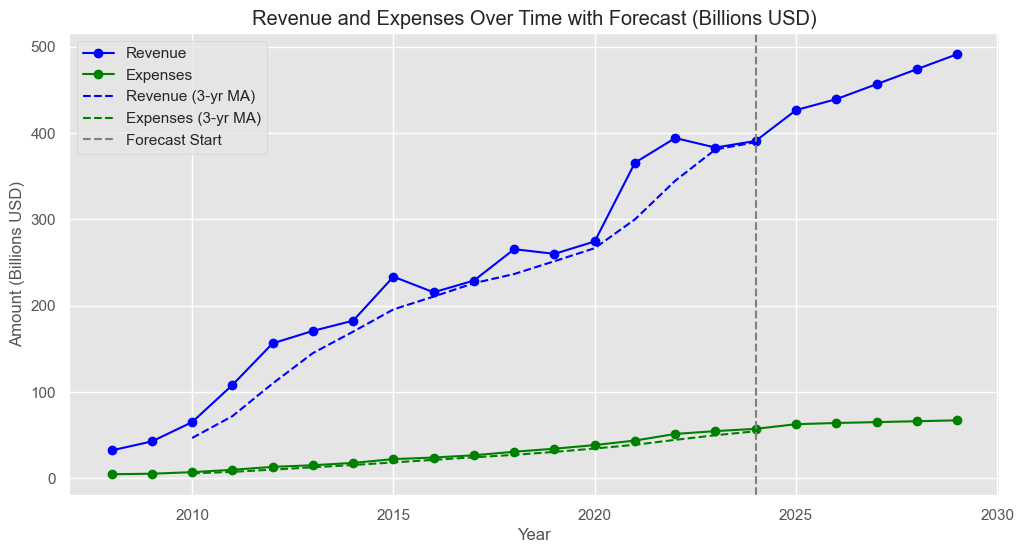

In [33]:
# 8. Visualizations
# Revenue and Expenses Plot
plt.figure(figsize=(12, 6))
plt.plot(combined_plot_data['year'], combined_plot_data['totalRevenue'], label='Revenue', color='blue', marker='o')
plt.plot(combined_plot_data['year'], combined_plot_data['totalOperatingExpenses'], label='Expenses', color='green', marker='o')
plt.plot(plot_data['year'], plot_data['revenue_ma'], label='Revenue (3-yr MA)', color='blue', linestyle='--')
plt.plot(plot_data['year'], plot_data['expenses_ma'], label='Expenses (3-yr MA)', color='green', linestyle='--')
plt.axvline(x=2024, color='gray', linestyle='--', label='Forecast Start')
plt.title('Revenue and Expenses Over Time with Forecast (Billions USD)')
plt.xlabel('Year')
plt.ylabel('Amount (Billions USD)')
plt.legend()
plt.grid(True)
plt.show()

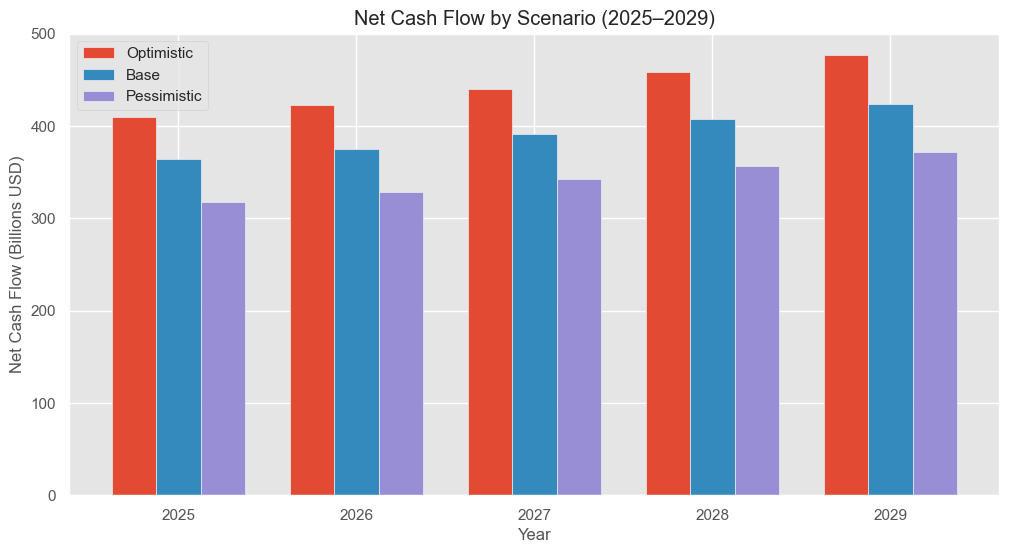

In [34]:
# Net Cash Flow Bar Plot for Scenarios
plt.figure(figsize=(12, 6))
bar_width = 0.25
years = forecast_table['year'].unique()
x = np.arange(len(years))

for i, scenario in enumerate(scenarios.keys()):
    scenario_data = forecast_table[forecast_table['scenario'] == scenario]
    plt.bar(x + i * bar_width, scenario_data['net_cash_flow'], width=bar_width, label=scenario.capitalize())

plt.xlabel('Year')
plt.ylabel('Net Cash Flow (Billions USD)')
plt.title('Net Cash Flow by Scenario (2025–2029)')
plt.xticks(x + bar_width, years)
plt.legend()
plt.grid(True)
plt.show()